In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

In [2]:
X, Y = make_circles(n_samples=100, noise=0.1, random_state=1)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

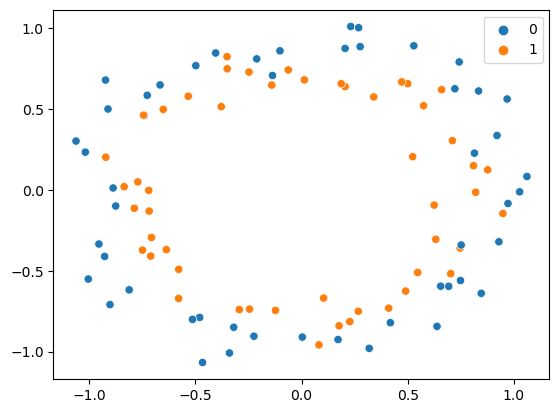

In [4]:
sns.scatterplot(X[:,0],X[:,1],hue=Y)

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=2)

In [6]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [7]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=3500, verbose=0)

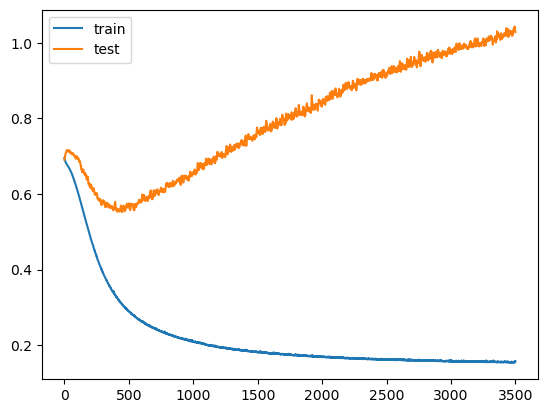

In [9]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 [==============================] - 6s 621us/step


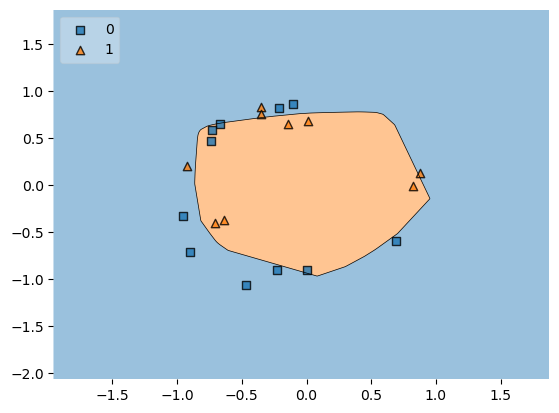

In [11]:
plot_decision_regions(X_test, Y_test.ravel(), clf = model, legend=2)
plt.show()

In [14]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [15]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False)

In [18]:
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=3500, callbacks=callback)

Epoch 1/3500
3/3 [==============================] - 0s 51ms/step - loss: 0.6935 - accuracy: 0.4750 - val_loss: 0.6949 - val_accuracy: 0.3500
Epoch 2/3500
3/3 [==============================] - 0s 17ms/step - loss: 0.6906 - accuracy: 0.5500 - val_loss: 0.6965 - val_accuracy: 0.4000
Epoch 3/3500
3/3 [==============================] - 0s 18ms/step - loss: 0.6908 - accuracy: 0.5250 - val_loss: 0.6995 - val_accuracy: 0.3500
Epoch 4/3500
3/3 [==============================] - 0s 14ms/step - loss: 0.6885 - accuracy: 0.5375 - val_loss: 0.7006 - val_accuracy: 0.4000
Epoch 5/3500
3/3 [==============================] - 0s 13ms/step - loss: 0.6874 - accuracy: 0.5375 - val_loss: 0.7019 - val_accuracy: 0.4000
Epoch 6/3500
3/3 [==============================] - 0s 17ms/step - loss: 0.6863 - accuracy: 0.5625 - val_loss: 0.7037 - val_accuracy: 0.4000
Epoch 7/3500
3/3 [==============================] - 0s 14ms/step - loss: 0.6857 - accuracy: 0.5500 - val_loss: 0.7058 - val_accuracy: 0.4000
Epoch 8/3500


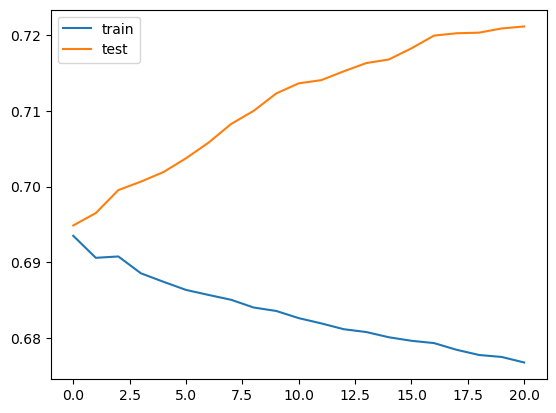

In [19]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 [==============================] - 6s 636us/step


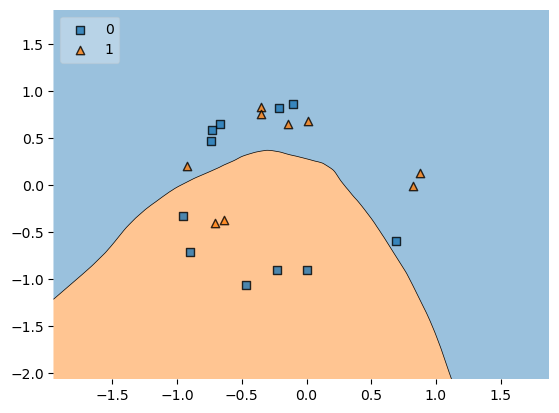

In [21]:
plot_decision_regions(X_test, Y_test.ravel(), clf = model, legend=2)
plt.show()